# Python Saati \#32

## Burak Suyunu- Gönül Aycı

![title](img/pokemon.png)

# --------------------------------------- Gotta tweet 'em all! ---------------------------------------

## Ünlü Pokemon Eğitmeni ve Filozof Sezen Aksu:

![title](img\sezen3.png)

 ## Pokemon Twitter Takipçi Atlası

![title](img\poke-connect.png)

# Efsanevi Kişilikler (Pokemonlar)

![title](img\influencer.png)

## Gerçek dünyaya dönecek olursa :) 

![title](img\om.png)

Gerekli module leri yüklüyoruz.

In [1]:
from pymongo import MongoClient
import pandas as pd
from birdy.twitter import UserClient, BirdyException 
from time import sleep
import string
import numpy as np
import networkx as nx
import pickle

Twitter API için oluşturuduğumz keyleri dosyadan okuyoruz

In [2]:
#key = [
#    ["Consumer Key", "Consumer Secret", "Access Token", "Access Token Secret"]
#]

key = []

filename = 'keys.txt'
f = open(filename, 'r', encoding='utf-8')

for line in f.readlines():
    l = line.splitlines()
    key.append(l[0].split(','))
f.close()

Konularımızı tanımlıyoruz

In [3]:
topics = ["arduino", "3d printing", "raspberry pi", "diy"]

Şimdi ise bu konularda Twitter üzeirinde en Influencer olan kişileri bulalım.

Bunun için Twitter'ın bize sağladığı users/search API endpointini kullanacağız.

https://developer.twitter.com/en/docs/accounts-and-users/follow-search-get-users/api-reference/get-users-search

In [5]:
from birdy.twitter import UserClient, BirdyException 

keyInd = 1
# client'a baglanalim
client = UserClient(key[keyInd][0], key[keyInd][1], key[keyInd][2], key[keyInd][3])

# Hangi API endpoint ine baglancagimizi yazalim
# CODE
response = client.api.users.search.get(q = "arduino", page = 1)
# CODE
 

In [6]:
import json
print(json.dumps(response.data[0], indent=4, sort_keys=True))

{
    "contributors_enabled": false,
    "created_at": "Tue Mar 15 04:57:49 +0000 2011",
    "default_profile": false,
    "default_profile_image": false,
    "description": "Arduino is an open-source electronics platform based on flexible, easy-to-use hardware and software.",
    "entities": {
        "description": {
            "urls": []
        },
        "url": {
            "urls": [
                {
                    "display_url": "arduino.cc",
                    "expanded_url": "https://www.arduino.cc",
                    "indices": [
                        0,
                        23
                    ],
                    "url": "https://t.co/Ha5xslgzZg"
                }
            ]
        }
    },
    "favourites_count": 5339,
    "follow_request_sent": false,
    "followers_count": 249326,
    "following": false,
    "friends_count": 332,
    "geo_enabled": true,
    "has_extended_profile": false,
    "id": 266400754,
    "id_str": "266400754",
    "is_tran

In [7]:
#key -> Influencer ID, value -> Topic ID
infIDtoTopic = {}

#key -> Influencer ID, value -> Topic Rank
infIDtoTopicRank = {}

# page * 20 number of users will be taken
pages = 5

keyInd = 1
# client'a baglanalim
client = UserClient(key[keyInd][0], key[keyInd][1], key[keyInd][2], key[keyInd][3])

for i, t in enumerate(topics):
    print(t)
    for p in range(1, pages+1):
        # Hangi API endpoint ine baglancagimizi yazalim
        response = client.api.users.search.get(q = t, page = p)
        
        for r in response.data:
            if r['id'] not in infIDtoTopic:
                infIDtoTopic[r['id']] = i
                infIDtoTopicRank[r['id']] = p
            elif p < infIDtoTopicRank[r['id']]:
                infIDtoTopic[r['id']] = i
                infIDtoTopicRank[r['id']] = p

arduino
3d printing
raspberry pi
diy


In [232]:
infIDtoTopic = {}
infIDtoTopicRank = {}

# page * 20 number of users will be taken
pages = 50

keyInd = 1
# client'a baglanalim
client = UserClient(key[keyInd][0], key[keyInd][1], key[keyInd][2], key[keyInd][3])

badError = False

for i, t in enumerate(topics):
    print(t)
    for p in range(1, pages+1):
        while(True):
            try:
                response = client.api.users.search.get(q = t, page = p)
                break
            except Exception as err:
                print(err.status_code)
                print(err)
                if err.status_code == 429:
                    sleep(30)
                    keyInd = (keyInd + 1)%len(key)
                else:
                    badError = True
                    break
                client = UserClient(key[keyInd][0], key[keyInd][1], key[keyInd][2], key[keyInd][3])

        if badError:
            print('Error!')
            badError = False
        else:
            for r in response.data:
                if r['id'] not in infIDtoTopic:
                    infIDtoTopic[r['id']] = i
                    infIDtoTopicRank[r['id']] = p
                elif p < infIDtoTopicRank[r['id']]:
                    infIDtoTopic[r['id']] = i
                    infIDtoTopicRank[r['id']] = p

arduino
3d printing
raspberry pi
diy


Pickle çok tatlı bir module. Pickle ile her türlü değişkenimizi bilgisayarımıza kaydedebiliyoruz.

In [8]:
#pickle.dump( infIDtoTopic, open( "infs.p", "wb" ) )
infIDtoTopic = pickle.load( open( "infs.p", "rb" ) )

In [9]:
infIDtoTopic

{760903253425020928: 0,
 733556344184152064: 0,
 861922073328967682: 2,
 2370076675: 0,
 730277181880852484: 2,
 711335498745118725: 0,
 712470960536813568: 0,
 716682940181266433: 0,
 2541640475: 0,
 2592186378: 2,
 14630924: 0,
 713540148332470274: 3,
 884981428722823169: 3,
 736023150278758403: 2,
 870335668886614017: 2,
 34988057: 3,
 3268288538: 2,
 25264156: 0,
 150970399: 2,
 316907552: 3,
 380436513: 3,
 514229595: 2,
 720287290317078529: 2,
 833066005177982982: 2,
 242868262: 1,
 337715207: 0,
 2303158855: 3,
 18980910: 0,
 2961088559: 0,
 305274929: 1,
 122232883: 3,
 188244022: 1,
 21889081: 1,
 197713979: 0,
 3344670784: 3,
 4447551553: 1,
 15261762: 1,
 81051717: 0,
 221175879: 0,
 1722892364: 1,
 18438840: 1,
 1735295060: 1,
 727228502: 2,
 329498714: 0,
 74170461: 0,
 708556056205660160: 3,
 578134116: 2,
 66822252: 2,
 287547501: 0,
 540106862: 0,
 552738930: 2,
 17466729: 3,
 3547644025: 1,
 25927802: 1,
 1412168383: 3,
 610812028: 1,
 68003178: 3,
 800700942043578372:

Şimdi ise Gönül'ün bizim için daha önceden çekip mongodb ye aktardığı bir kaç bilgiye erişeceğiz.

İçerik olarak, user_id sütununda openmaker'ın takipçileri, friends_id sütunun da ise bu takipçilerimizin takip ettikleri insanlar var.

![title](img\poke-connect.png)

In [10]:
# mongodb ye baglanalim
client = MongoClient()

db = client.openmaker

friends1 = pd.DataFrame(list(db.user_friend_ids_1.find()))
friends2 = pd.DataFrame(list(db.user_friend_ids_2.find()))
friends3 = pd.DataFrame(list(db.user_friend_ids_3.find()))

#Bu 3 DataFrame i tek bir DataFrame altinda birlestirelim.
# CODE
frames = [friends1, friends2, friends3]
friends = pd.concat(frames, ignore_index=True)
# CODE

In [11]:
friends

,_id,friend_ids,user_id
0,59cfc6fd7e676e30e9a6a8f4,"2674921,756671832,3317198225,79995912273312563...",725808726
1,59cfc6fd7e676e30e9a6a8f5,"4047855446,882870474681745408,115437188,280051...",912077087443488771
2,59cfc6fc7e676e30e9a6a8f0,"836564621729345537,2958456623,198626433,880636...",362530301
3,59cfc6fd7e676e30e9a6a8f1,"529360313,2853329560,1419199002,576560308,5555...",887295098488320000
4,59cfc6fe7e676e30e9a6a8f8,,900400573253652481
5,59cfc6fe7e676e30e9a6a8f9,"390050448,2844841960,3071834662,79995912273312...",330477336
6,59cfc6fe7e676e30e9a6a8f7,"838676801845067776,776454333269471232,79995912...",3289773167
7,59cfc6fd7e676e30e9a6a8f2,"13835812,48903,3361609025,5690612,125306951,79...",1913181
8,59cfca807e676e30e9a6a8fc,"1448128436,15804774,799959122733125632,9317817...",2295148106
9,59cfc6fe7e676e30e9a6a8fa,"1392116180,799959122733125632,7513263467904655...",120596672


friends_id sütunu biraz çirkin duruyor ve tek tek ordaki kullanıcılara ulaşması şuanda bir hayli zor.

Bu yüzden bu iki sütunu daha basit bir veri yapısı olan listelere aktarıyoruz.

**Önemli:** Burada dikkat edilmesi gereken husus, 28. satırdaki takipçimizdeki gibi bazı kullanıcılar bilgilerini gizli tuttukları için onların çok kısıtlı bilgilerine ulaşabiliyoruz. Bizim analizimiz de ise takip etme bilgisi gerektiği için bu kullanıcıları yoksayacağız.

In [12]:
user_ids = []
for i in range(len(friends)):
    # Takip etme bilgisi bulunuyor mu diye kontrol ediyoruz.
    # iloc  satır uzerinden ulaşım sağlıyor.
    if len(friends.iloc[i]["friend_ids"]) != 0:
        user_ids.append(friends.iloc[i]['user_id'])

friend_ids = []
for fids in friends['friend_ids']:
    if len(fids) != 0:
        temp = []
        for fid in fids.split(','):
            try:
                temp.append(int(fid))
            except:
                continue
        friend_ids.append(temp)

In [13]:
user_ids

[725808726,
 912077087443488771,
 362530301,
 887295098488320000,
 330477336,
 3289773167,
 1913181,
 2295148106,
 120596672,
 4331283147,
 2415027314,
 2438242003,
 3586932915,
 983202636,
 65174870,
 904997206981259264,
 597404002,
 27407633,
 4178421976,
 619792945,
 1088808283,
 65468169,
 260918875,
 3921116847,
 1134175273,
 118493523,
 753108803877531649,
 2279752214,
 27675369,
 208741579,
 35514480,
 395203909,
 856402700,
 4187245996,
 296377518,
 74677777,
 166389845,
 11268142,
 837038392961564675,
 2559170372,
 95098920,
 33462080,
 561999301,
 209075024,
 766991515759415297,
 898874553224486915,
 2764600091,
 826871749195231232,
 1673828448,
 1872270133,
 20515207,
 14982823,
 129388259,
 1158498979,
 1281673860,
 1669776499,
 121388205,
 885235262149799936,
 804263795770195968,
 51401495,
 847031866658054144,
 519744095,
 2317904965,
 461494325,
 8123772,
 421433392,
 63154503,
 52041328,
 198876269,
 492617665,
 869819296612048897,
 2927321548,
 21557232,
 14397047,
 27

İleride kullanmak için takipçilerimizin isimlerini çekiyoruz.

In [244]:
client = UserClient(key[0][0], key[0][1], key[0][2], key[0][3])

info = [
    'id',
    'screen_name',
    'name'
]

userInfo = []
userIDs = []

for uid in user_ids:
    userIDs.append(str(uid))

for i in range(int(len(userIDs)/100)+1):
    imin = i*100
    imax = (i+1)*100
    if i == int(len(userIDs)/100):
        imax = len(userIDs)
    while(True):
        try:
            response = client.api.users.lookup.get(user_id=userIDs[imin : imax])
            for rd in response.data:
                tmpInfo = []
                for i in info:
                    tmpInfo.append(rd[i])
                userInfo.append(tmpInfo)
            break
        except Exception as err:
            print(err.status_code)
            print(err)
            if err.status_code == 429:
                sleep(60)
                keyInd = (keyInd + 1)%len(key)
            else:
                break
            client = UserClient(key[keyInd][0], key[keyInd][1], key[keyInd][2], key[keyInd][3])

In [14]:
#pickle.dump( userInfo, open( "users.p", "wb" ) )
userInfo = pickle.load( open( "users.p", "rb" ) )

In [15]:
userInfo

[[725808726, 'katiaonthemoon', 'katia'],
 [912077087443488771, 'CorcioneLuisa', 'Luisa Corcione'],
 [362530301, 'FABULISalex', 'FABULIS Fablab Edu.'],
 [887295098488320000, 'Findoutdigital', 'Findout'],
 [330477336, 'CuninganLostPwd', 'Cuningan Re Set'],
 [3289773167, 'microhenrio', 'Abel Rodriguez'],
 [1913181, 'costantino', 'Costantino Bongiorno'],
 [2295148106, 'spazioYATTA', 'YATTA! Fai da noi'],
 [120596672, 'diegotrap', 'Diego Trapero'],
 [4331283147, 'the_polifactory', 'Polifactory'],
 [2415027314, 'liightuk', 'Liight'],
 [2438242003, 'vg_emprender', 'Centros de Empresas'],
 [3586932915, 'A_Escrich', 'Almudena Escrich'],
 [983202636, 'lpoolunderlined', 'Liverpool Underlined'],
 [65174870, 'orbeliano', 'Luis Negrete'],
 [904997206981259264, 'MuseomixESP', 'MuseomixESP'],
 [597404002, 'VictorHR3', 'Victor H.R.'],
 [27407633, 'JayneLawless', 'jayne lawless'],
 [4178421976, 'GrowaGroup', 'Grow-a-Group'],
 [619792945, 'ruffatech', 'RUFFA'],
 [1088808283, 'MechTech4', 'MechTech'],
 [6

Buraya kadar olan kısımda bilgilerimizi topladık ve onları kullanmaya hazır veri yapıları içinde bekletiyoruz.

Burdan sonra ise artık heyecanlı kısım başlıyor :)

### Topic Dağılımını Bulmaca

![title](img\poke-connect3.png)

Her takipçimizin kaçar tane hangi topic'ten influencer takip ettiklerini bulacağız

In [16]:
# Topic Distribution for each user, [0] index is non influencer friends
# Has users*len(topics+1) size 
userTopics = []


for i in range(len(user_ids)):
    topicCount = [0]*(len(topics)+1)
    
    for fid in friend_ids[i]:
        if fid in infIDtoTopic:
            topicCount[infIDtoTopic[fid]] += 1
        else:
            topicCount[-1] += 1
            
    userTopics.append(topicCount)
    
userTopics

[[3, 0, 0, 0, 401],
 [0, 0, 0, 0, 181],
 [7, 6, 1, 3, 753],
 [1, 0, 0, 0, 71],
 [7, 0, 2, 0, 395],
 [15, 1, 9, 5, 696],
 [21, 29, 5, 10, 1805],
 [11, 17, 3, 3, 610],
 [10, 38, 3, 2, 981],
 [0, 0, 0, 0, 55],
 [1, 2, 0, 0, 328],
 [1, 0, 1, 0, 1578],
 [0, 0, 0, 0, 191],
 [3, 2, 0, 1, 4381],
 [0, 0, 0, 0, 1858],
 [0, 0, 0, 0, 66],
 [9, 146, 2, 3, 3520],
 [1, 0, 0, 1, 1532],
 [1, 0, 0, 0, 892],
 [0, 0, 0, 0, 299],
 [4, 2, 6, 4, 1217],
 [1, 0, 0, 0, 175],
 [0, 0, 0, 0, 3799],
 [0, 0, 0, 1, 849],
 [0, 0, 0, 1, 2379],
 [3, 3, 0, 1, 1194],
 [0, 0, 0, 0, 1146],
 [0, 0, 0, 0, 474],
 [1, 2, 0, 1, 1035],
 [23, 26, 7, 6, 922],
 [0, 0, 0, 0, 979],
 [22, 7, 6, 4, 421],
 [10, 4, 2, 0, 4577],
 [7, 6, 1, 3, 589],
 [21, 73, 4, 4, 1069],
 [1, 0, 0, 0, 104],
 [11, 40, 4, 8, 2023],
 [1, 0, 0, 0, 2015],
 [0, 0, 0, 0, 35],
 [0, 1, 0, 0, 177],
 [2, 0, 0, 0, 196],
 [9, 1, 9, 2, 417],
 [3, 2, 3, 5, 992],
 [12, 13, 1, 2, 2678],
 [0, 0, 0, 0, 96],
 [1, 1, 0, 0, 320],
 [0, 0, 0, 0, 255],
 [1, 9, 0, 0, 116],
 [2, 0, 

Normalize Ediyoruz

In [17]:
userTopicsNorm = []

for uT in userTopics:
    if sum(uT[:-1]) == 0:
        utNorm = [0.0] * (len(topics)+1)
        if uT[-1] > 0:
            utNorm[-1] = 1.0
    else:
        utNorm = [float(i)/sum(uT[:-1]) for i in uT[:-1]] + [0]
    userTopicsNorm.append(utNorm)
    
userTopicsNorm

[[1.0, 0.0, 0.0, 0.0, 0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [0.4117647058823529,
  0.35294117647058826,
  0.058823529411764705,
  0.17647058823529413,
  0],
 [1.0, 0.0, 0.0, 0.0, 0],
 [0.7777777777777778, 0.0, 0.2222222222222222, 0.0, 0],
 [0.5, 0.03333333333333333, 0.3, 0.16666666666666666, 0],
 [0.3230769230769231,
  0.4461538461538462,
  0.07692307692307693,
  0.15384615384615385,
  0],
 [0.3235294117647059, 0.5, 0.08823529411764706, 0.08823529411764706, 0],
 [0.18867924528301888,
  0.7169811320754716,
  0.05660377358490566,
  0.03773584905660377,
  0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 0],
 [0.5, 0.0, 0.5, 0.0, 0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [0.5, 0.3333333333333333, 0.0, 0.16666666666666666, 0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [0.05625, 0.9125, 0.0125, 0.01875, 0],
 [0.5, 0.0, 0.0, 0.5, 0],
 [1.0, 0.0, 0.0, 0.0, 0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [0.25, 0.125, 0.375, 0.25, 0],
 [1.0, 0.0, 0.0, 0.0, 0],
 [0.0, 0.0, 0

Hangi Konuya en çok eğilimliyse o konuyu takip ettiğini kabul ediyoruz.

In [18]:
topicDist = [0]*(len(topics)+1)
for i in range(len(user_ids)):
    if userTopicsNorm[i][len(topics)] == 1.0:
        topicDist[-1] += 1
    else:
        t = userTopicsNorm[i].index(max(userTopicsNorm[i]))
        topicDist[t] += 1
        
topicDist

[71, 51, 9, 20, 64]

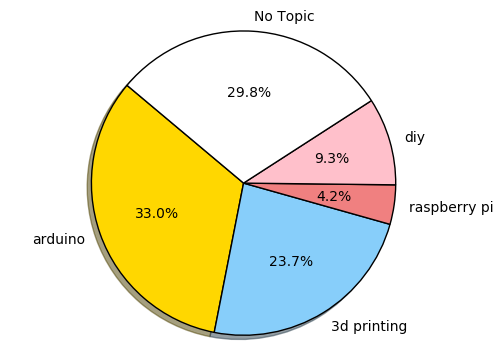

In [19]:
import matplotlib.pyplot as plt
 
# Colors of pie  charts
colors = ['gold', 'lightskyblue', 'lightcoral', 'pink', 'white']
 
# Plot
# CODE
plt.pie(topicDist, labels=topics+["No Topic"], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
# CODE
 
plt.axis('equal')
plt.show()

### Takipçi Network

![title](img\network2.png)

Burada iki değişken oluşturuyoruz:

userNet[i][j] = 1 ==> i follows j

userPops[i] = K ==> i. kullaniciyi K tane kisi takip ediyor

In [20]:
# how many user is following each user in the openmaker follower network
# this is for graph node size and edges

# userPops[i] = K ==> i. kullaniciyi K tane kisi takip ediyor
userPops = [0]*len(user_ids)

# userNet[i][j] = 1 ==> i follows j
userNet = [[0 for x in range(len(user_ids))] for y in range(len(user_ids))]

for i, frs in enumerate(friend_ids):
    for j, u in enumerate(user_ids):
        if u in frs:
            userNet[i][j] = 1
            userPops[j] += 1
        

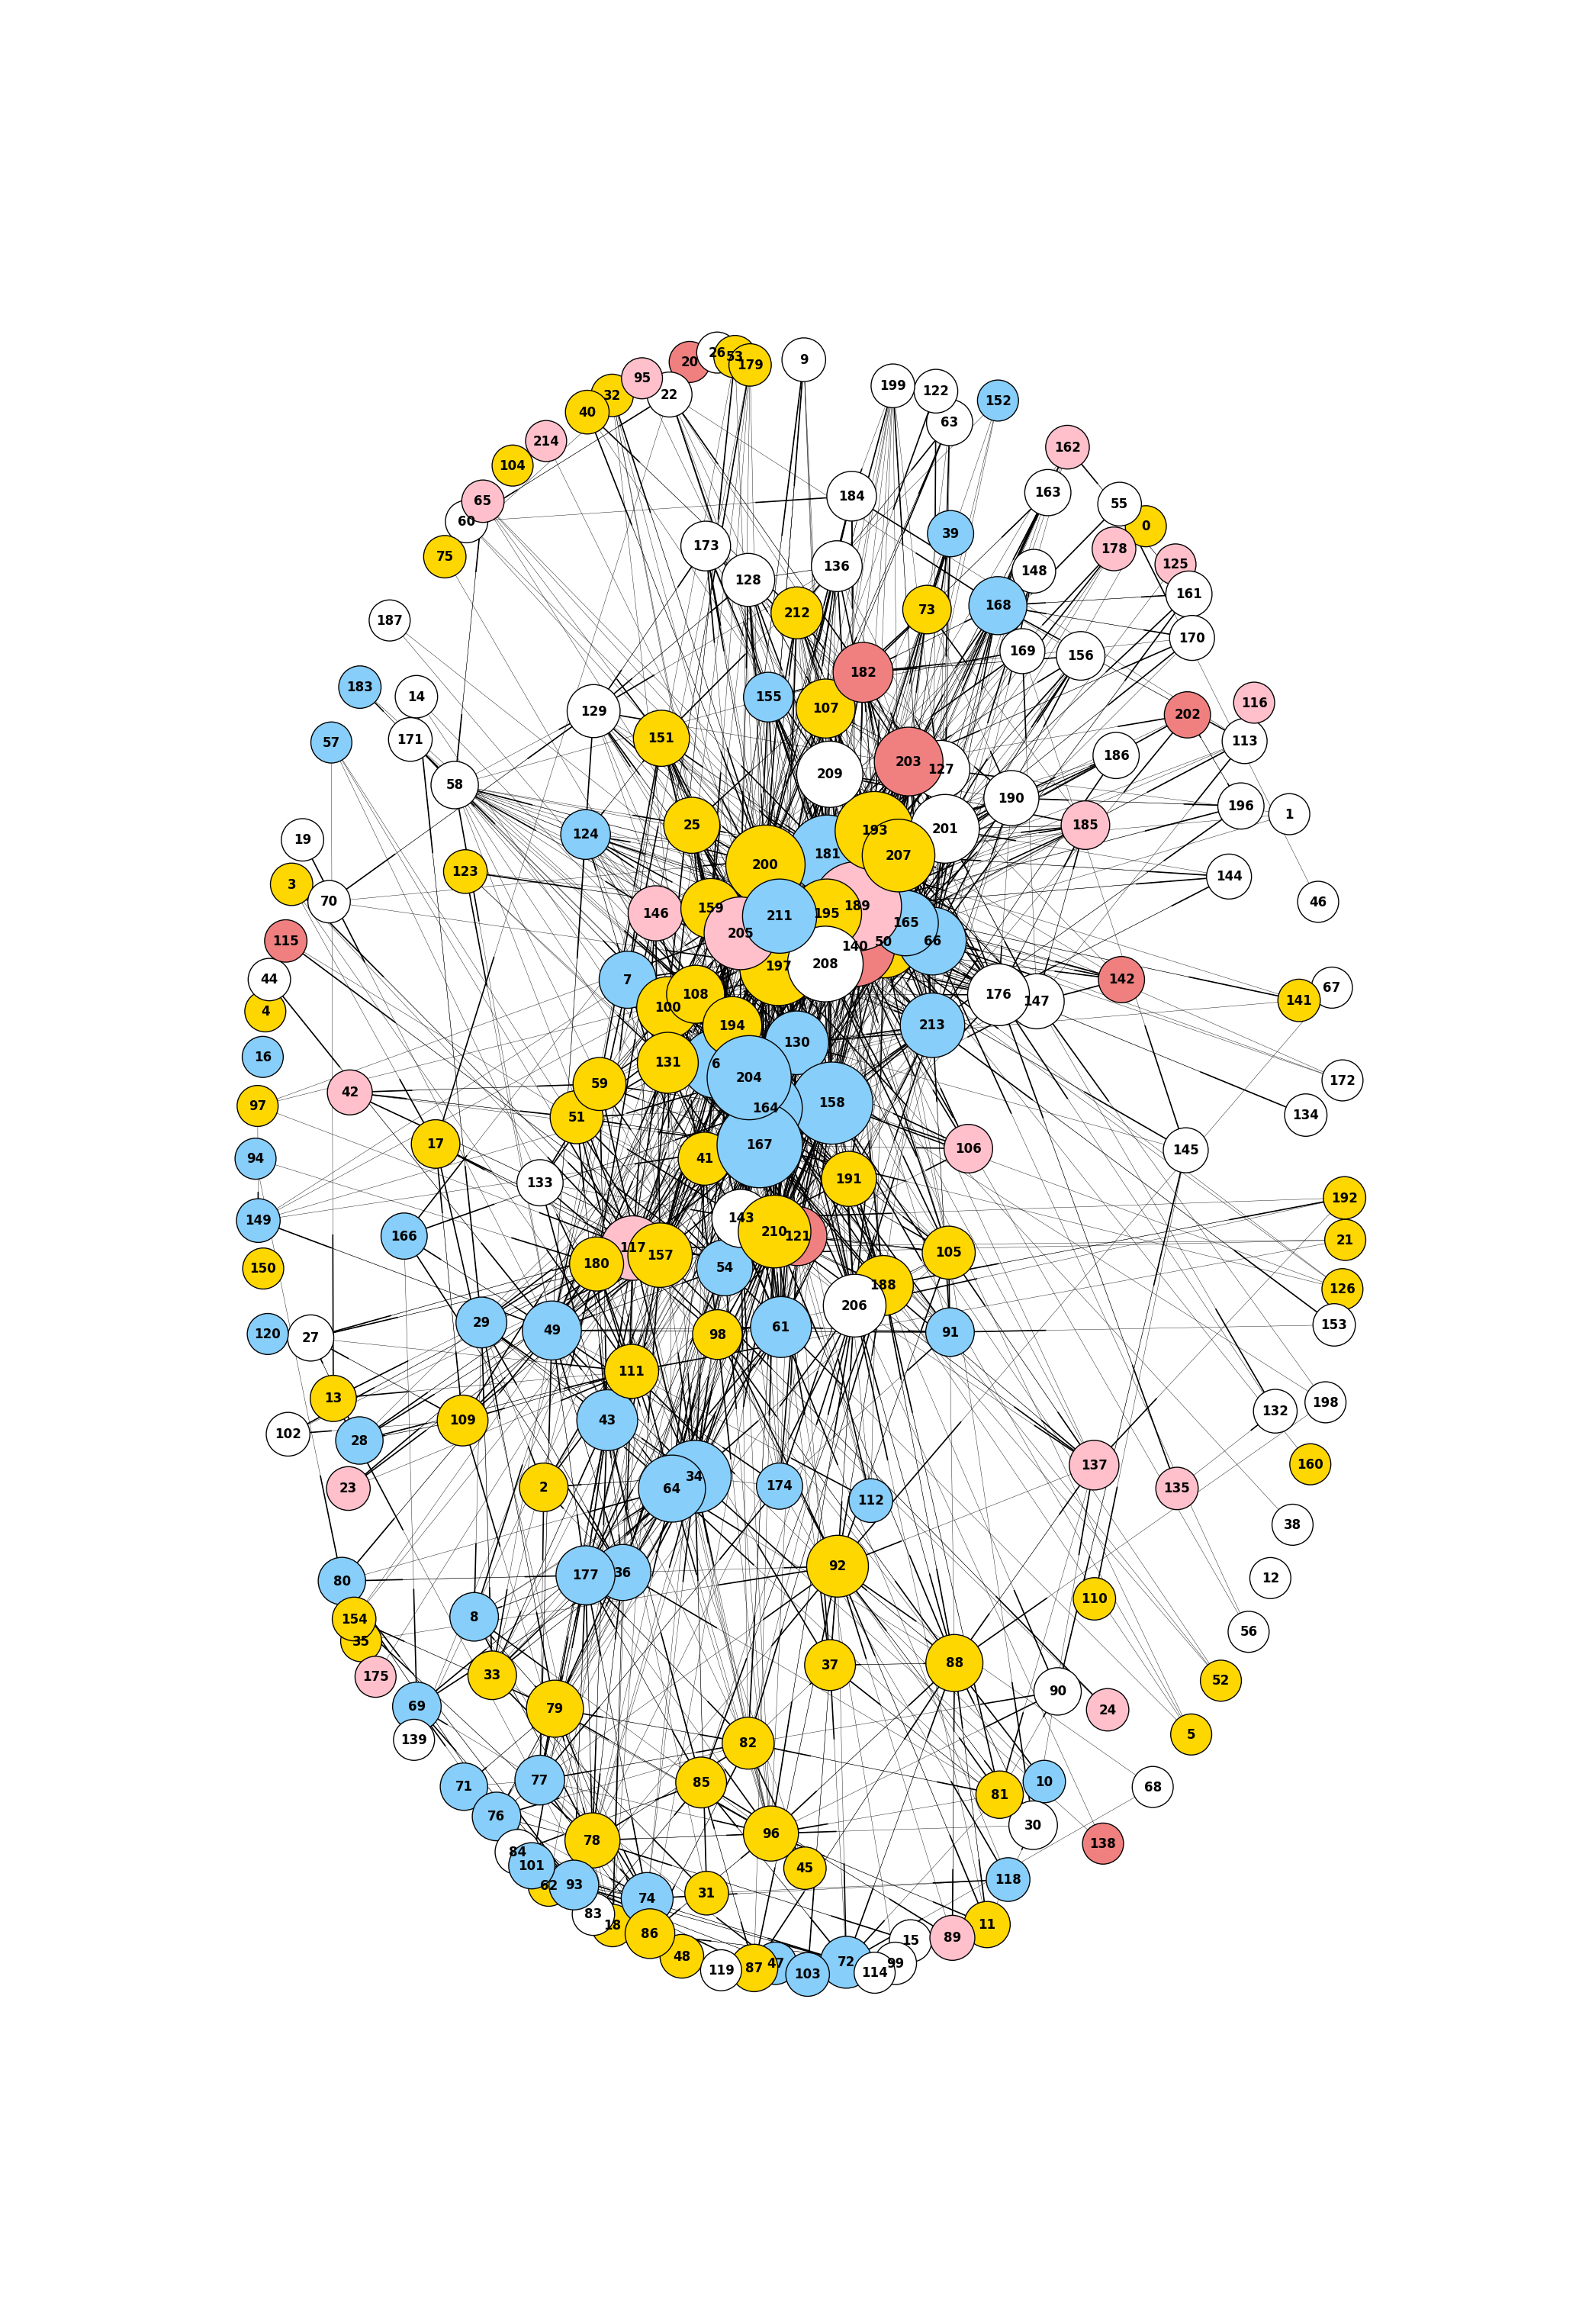

In [21]:
import networkx as nx

G = nx.DiGraph()

nodecolors = []
nodetopics = []
nodeSizes = []
            
for i in range(len(user_ids)):
    for j in range(len(user_ids)):
        if userNet[i][j] == 1:
            # CODE
            G.add_edge(i,j, weight=0.3)
            # CODE

for i in range(len(user_ids)):
    nodeSizes.append(1500+100*userPops[i])

for i in range(len(user_ids)):
    G.add_node(i)
    if userTopicsNorm[i][len(topics)] == 1.0:
        nodecolors.append('white')
        nodetopics.append('No Topic') 
    else:
        t = userTopicsNorm[i].index(max(userTopicsNorm[i]))
        nodetopics.append(topics[t])
        if t == 0:
            nodecolors.append('gold')
        elif t == 1:
            nodecolors.append('lightskyblue')
        elif t == 2:
            nodecolors.append('lightcoral')
        else:
            nodecolors.append('pink')
    
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

plt.figure(1, figsize=(20,30))

nx.draw(G, edges=edges, node_color=nodecolors, width=weights, with_labels=True, node_size = nodeSizes, font_weight='bold')

plt.show()

In [22]:
filename = 'nodes.csv'
f = open(filename, 'w', encoding='utf-8')

f.write("id,name,sname,topic")
f.write('\n')
for i, n in enumerate(G.nodes()):
    f.write(str(n) + ',' + userInfo[n][2] + ',' + userInfo[n][1] + ',' + nodetopics[i])
    f.write('\n')
f.close()

filename = 'edges.csv'
f = open(filename, 'w', encoding='utf-8')

f.write("Source,Target")
f.write('\n')
for u,v in G.edges():
    f.write(str(u) + ',' + str(v))
    f.write('\n')
f.close()